In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import accuracy_score, r2_score
from sklearn.neighbors import KNeighborsRegressor

In [191]:
car_df = pd.read_csv('CAR DETAILS.csv')

In [192]:
car_df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [193]:
car_df.shape

(4340, 8)

In [194]:
car_df['name']

0                             Maruti 800 AC
1                  Maruti Wagon R LXI Minor
2                      Hyundai Verna 1.6 SX
3                    Datsun RediGO T Option
4                     Honda Amaze VX i-DTEC
                       ...                 
4335    Hyundai i20 Magna 1.4 CRDi (Diesel)
4336             Hyundai i20 Magna 1.4 CRDi
4337                    Maruti 800 AC BSIII
4338       Hyundai Creta 1.6 CRDi SX Option
4339                       Renault KWID RXT
Name: name, Length: 4340, dtype: object

In [195]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [196]:
car_df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


# Preprocessing

In [197]:
# Regular Expression
import re
def extract_title(name):
    k = re.compile(r"^\W*(\w+).")
    #if k.search(name) is None:
        #print(name)
    return k.search(name).groups(1)[0].strip()

car_df['Title'] = car_df['name'].apply(lambda name: extract_title(name))

In [198]:
car_df['Title'].value_counts()

Title
Maruti        1280
Hyundai        821
Mahindra       365
Tata           361
Honda          252
Ford           238
Toyota         206
Chevrolet      188
Renault        146
Volkswagen     107
Skoda           68
Nissan          64
Audi            60
BMW             39
Fiat            37
Datsun          37
Mercedes        35
Jaguar           6
Mitsubishi       6
Land             5
Volvo            4
Ambassador       4
Jeep             3
MG               2
OpelCorsa        2
Daewoo           1
Force            1
Isuzu            1
Kia              1
Name: count, dtype: int64

In [199]:
current_year = 2025
car_df["car_age"] = current_year - car_df["year"]

In [200]:
car_df['log_price'] = np.log10(car_df['selling_price'])

In [201]:
num_feature = [ 'car_age','km_driven']
cat_feature = ['fuel', 'seller_type','transmission','owner']
feature_cols = num_feature + cat_feature
print(feature_cols)

['car_age', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner']


In [202]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [203]:
X = car_df[feature_cols]
y = car_df['log_price']

In [204]:
num_transform = Pipeline(steps=[
    ( 'scaler', StandardScaler())
])
cat_transform = Pipeline(steps=[
    ('encoder',OneHotEncoder())
])

In [205]:
preprocessor = ColumnTransformer(transformers=[
    ('num', num_transform, num_feature),
    ('cat', cat_transform,cat_feature)
])

In [206]:
preprocessor.fit_transform(X)

array([[ 1.44507431,  0.08113906,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.44507431, -0.3476891 ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.2587948 ,  0.7243813 ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.97056251,  0.35987736,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [-0.69022881,  0.50996722,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.69022881, -0.56210318,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [207]:
X = preprocessor.transform(X)

In [208]:
X_train, X_test ,y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [209]:
Log_reg =LinearRegression()

In [210]:
Log_reg.fit(X_train,y_train)

LinearRegression()

In [211]:
print('Score training data:', Log_reg.score(X_train, y_train))
print('Score test data:',Log_reg.score(X_test,y_test))

Score training data: 0.6851345330212941
Score test data: 0.6889798163473835


In [212]:
training_data_prediction = Log_reg.predict(X_train)

In [213]:
error_score = r2_score(y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.6851345330212941


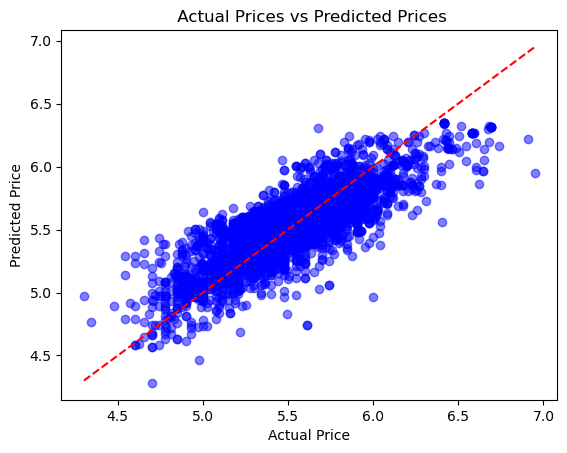

In [238]:
plt.scatter(y_train, training_data_prediction, alpha= 0.5, color = 'blue')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')
plt.show()

In [215]:
test_data_prediction = Log_reg.predict(X_test)

In [216]:
error_score = r2_score(y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.6889798163473835


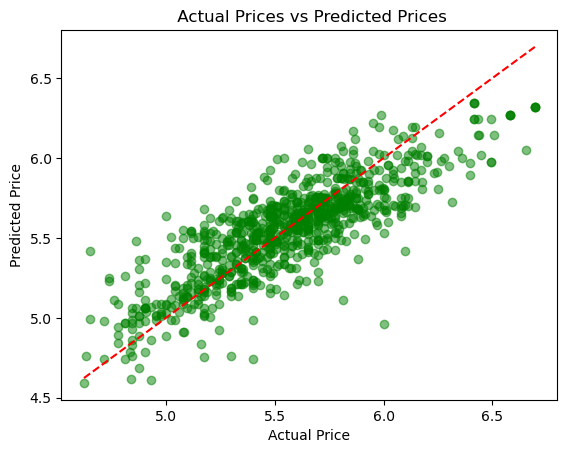

In [230]:
plt.scatter(y_test, test_data_prediction, alpha=0.5, color = 'green')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  
plt.show()

In [220]:
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train, y_train)
y_pred_knn = knn_reg.predict(X_test)

In [222]:
r2_knn = r2_score(y_test, y_pred_knn)
print("R-squared (KNN):", r2_knn)

R-squared (KNN): 0.6883898934808594


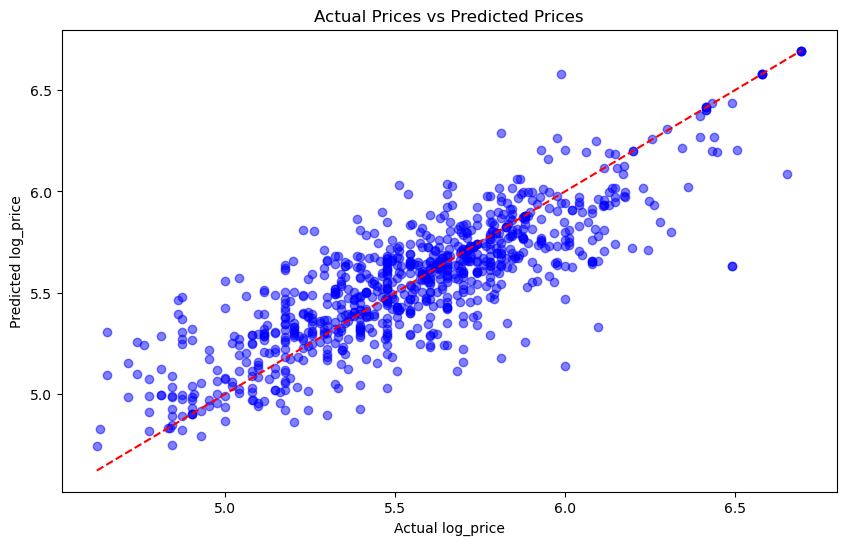

In [225]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_knn, color='blue', alpha=0.5)  
plt.xlabel('Actual log_price')
plt.ylabel('Predicted log_price')
plt.title('Actual Prices vs Predicted Prices')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  
plt.show()